---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

In [2]:
fraud = pd.read_csv('fraud_data.csv')
fraud.iloc[:, -1].astype('category')
X = fraud.iloc[:, :-1]
y = fraud.iloc[:, -1]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
V1        21693 non-null float64
V2        21693 non-null float64
V3        21693 non-null float64
V4        21693 non-null float64
V5        21693 non-null float64
V6        21693 non-null float64
V7        21693 non-null float64
V8        21693 non-null float64
V9        21693 non-null float64
V10       21693 non-null float64
V11       21693 non-null float64
V12       21693 non-null float64
V13       21693 non-null float64
V14       21693 non-null float64
V15       21693 non-null float64
V16       21693 non-null float64
V17       21693 non-null float64
V18       21693 non-null float64
V19       21693 non-null float64
V20       21693 non-null float64
V21       21693 non-null float64
V22       21693 non-null float64
V23       21693 non-null float64
V24       21693 non-null float64
V25       21693 non-null float64
V26       21693 non-null float64
V27       21693 non-null float64


<IPython.core.display.Javascript object>


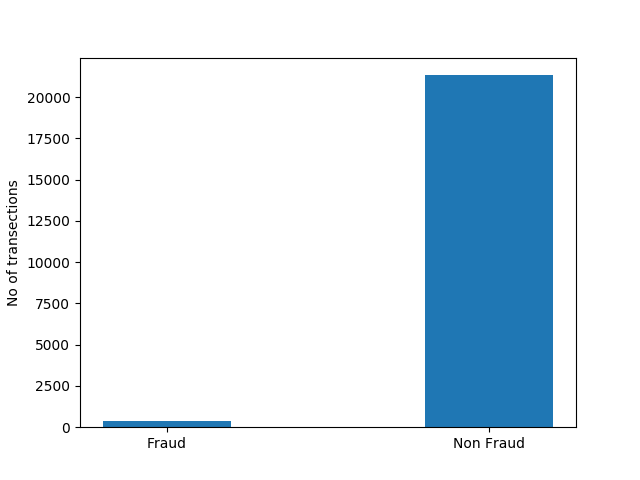

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
fraud_transection  = len(y[y==1])
non_fraud_transection = len(y[y==0])
plt.bar(np.arange(2), [fraud_transection ,non_fraud_transection], width =.4)
plt.xticks(np.arange(2), ('Fraud','Non Fraud'))
plt.ylabel('No of transections')
plt.show()

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
def answer_one():
    
    fraud_transection  = len(y[y==1])
    non_fraud_transection = len(y[y==0])
    return fraud_transection/ len(y)
    

answer_one()

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [7]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    classifr = DummyClassifier(strategy = 'most_frequent')
    classifr.fit(X_train, y_train)

    y_pred = classifr.predict(X_test)

    accuracy_score = accuracy_score(y_test, y_pred)
    recall_score = recall_score(y_test, y_pred)

    return (accuracy_score, recall_score)

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [8]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score,accuracy_score
    from sklearn.svm import SVC
    classifier = SVC(C=1, kernel='rbf')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    recall_score = recall_score(y_test, y_pred)
    precision_score = precision_score(y_test, y_pred)
    accuracy_score = accuracy_score(y_test, y_pred)

    return (accuracy_score, recall_score, precision_score)

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [9]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    classifier = SVC(C= 1e9, gamma= 1e-07, kernel='rbf')
    classifier.fit(X_train, y_train)
    # Predicting decision functio outcome for test data
    y_score_svc = classifier.decision_function(X_test)
    # Converting the decision function outcome to binary output depending on threashold
    y_pred = np.where(y_score_svc > -220, 1,0)
    # Estimating confusion matrix
    return confusion_matrix(y_test, y_pred)
    
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


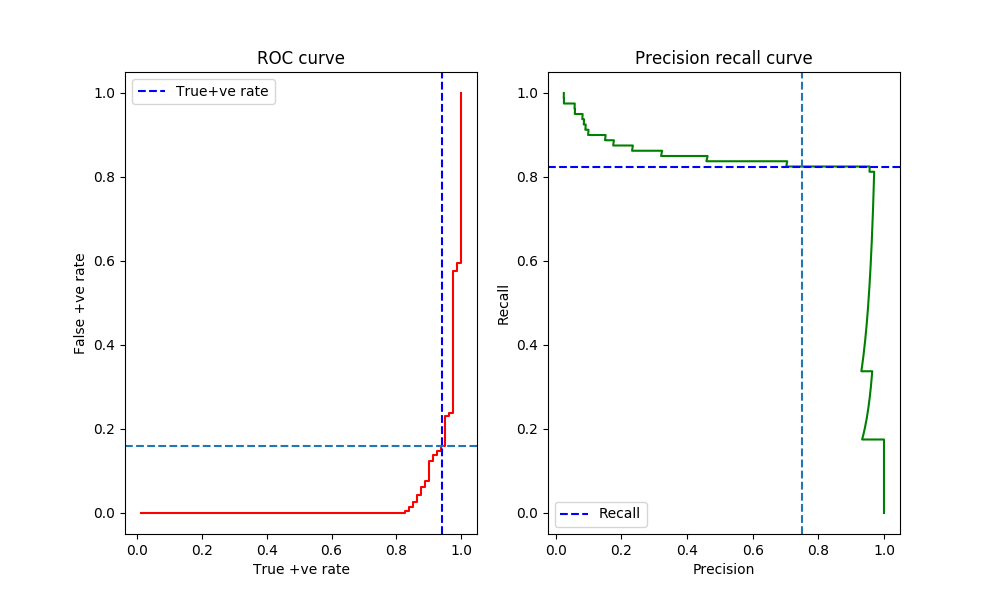

In [10]:
 

%matplotlib notebook
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train)
y_prob = log_regressor.decision_function(X_test)

# Calculating ROC curve using y_test and y_prob
fpr, tpr, threashold = roc_curve(y_test, y_prob)
precision, recall, threasholds = precision_recall_curve(y_test, y_prob)
# Plotting roc and precission_recall curve

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.plot(tpr, fpr, c ='r')
y_search = .94
ax1.axhline(.16, linestyle='--')
ax1.axvline(y_search, linestyle='--', c='b', label='True+ve rate')
ax1.set_xlabel('True +ve rate')
ax1.set_ylabel('False +ve rate')
ax1.set_title('ROC curve')
ax1.legend()

ax2.plot(precision, recall, c='g')
x_search = .825
ax2.axvline(.75, linestyle='--')
ax2.axhline(x_search, linestyle='--', c='b', label='Recall')
ax2.set_xlabel('Precision')
ax2.set_ylabel('Recall')
ax2.set_title('Precision recall curve')
ax2.legend()
plt.show()
    
    



In [11]:
def answer_five():
    
    return (x_search, y_search)

answer_five()

(0.825, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [12]:
def answer_six():
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    import numpy as np
    model = LogisticRegression()
    param = {'penalty': ['l1', 'l2'], 
             'C':[0.01, 0.1, 1, 10, 100] }
    log_regressor = GridSearchCV(model, param_grid= param, cv=3 ,scoring ='recall')
    log_regressor.fit(X_train, y_train)

    results = log_regressor.cv_results_
    # Converting results into dataframe
    df = pd.DataFrame(results)
    # Extracting required columns
    mean_score = df.loc[:, ['mean_test_score','param_C','param_penalty']]
    mean_score
    # Extracting all the mean_scores in a list
    score =[]
    C = [.01, .1, 1, 10, 100]
    for c in C:
        for j in range(len(mean_score)):
            if mean_score['param_C'][j] == c:
                score.append(mean_score['mean_test_score'][j])
    # Coverting list into 2D array
    return np.array(score).reshape(len(C),2)

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


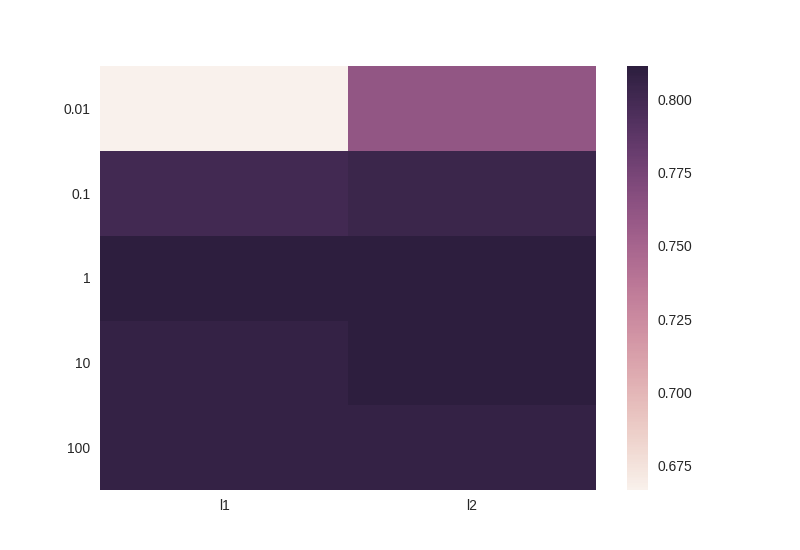

In [15]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())